In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 모든 열 보기 설정
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.0f}'.format
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [11]:
df = pd.read_csv('final_결측치제거2.csv',encoding='utf-8')
df

,기준년월,가명식별자,외감구분,설립일자,종업원수,주소지시군구,유동자산,비유동자산,당좌자산,재고자산,유형자산,재공품,현금,현금등가물,상품유가증권,현금성자산,매출채권,매출채권(전기),매출채권처분손실(당기),무형자산,투자자산,자산총계,자산총계(전기),유동부채,단기차입금,차입금,매입채무,비유동부채,부채총계,자기자본(납입자본금),자본잉여금,납입자본,이익잉여금,자본조정,기타포괄손익누계액,유보금,자본총계,전기자본총계,매출액,전기매출액,매출원가,매출총이익,판매비와관리비,법인세비용차감전 순이익,전기법인세차감전순이익,법인세,계속사업이익,중단산업손익,금융비용,영업손익,전기영업이익,영업외수익,영업외비용,법인세차감전순이익,당기순이익,당기순이익(전기),현금흐름,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,부채상환계수,영업이익이자보상배율,이자비용,사채이자(당기),이자보상배율,적립금비율,EBIT,EBITDA,청산가치율,청산가치,순운전자본,순차입금,재무비율_총자산증가율,재무비율_부채비율,재무비율_자기자본비율,재무비율_유동비율,재무비율_차입금의존도,재무비율_매출액증가율,재무비율_영업이익율,재무비율_당기순이익율,재무비율_매출원가율,재무비율_판관비율,재무비율_자기자본이익률(ROE),재무비율_매출채권회전율,재무비율_재고자산회전율,재무비율_매입채무회전율,재무비율_총자산회전율,재무비율_총자산순이익률,재무비율_유동자산증가율,재무비율_유형자산증가율,단기차입금의존도,당좌비율,순차입금비율,순운전자본회전율,총자본회전율,자기자본순이익율,매출총이익율,EBITDA마진율,영업이익증가율,당기순이익증가율,EBITDA증가율,OCF/매출액비용,부채상환계수.1,차입금/EBITDA,EBITDA/금융비용,사업장소유여부,소유건축물건수,소유건축물실거래가합계,사업장권리침해여부,소유건축물권리침해여부,기업신용공여연체과목수(일보)(미해제),기업신용공여연체과목수(일보)(3개월내유지)(해제포함),기업신용공여연체과목수(일보)(6개월내유지)(해제포함),기업신용공여연체과목수(일보)(1년내유지)(해제포함),기업신용공여연체과목수(일보)(3년내유지)(해제포함),기업신용공여연체과목수(일보)(3개월내발생)(해제포함),기업신용공여연체과목수(일보)(6개월내발생)(해제포함),기업신용공여연체과목수(일보)(1년내발생)(해제포함),기업신용공여연체과목수(일보)(3년내발생)(해제포함),기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체과목수(일보)(6개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체과목수(일보)(1년내유지)(연체일수30일이상)(해제포함),기업신용공여연체과목수(일보)(3년내유지)(연체일수30일이상)(해제포함),기업신용공여30일이상연체과목수(일보)(해제포함),기업신용공여30일이상연체과목수(일보)(미해제),기업신용공여30일이상연체과목수(일보)(이자연체)(해제포함),기업신용공여30일이상연체과목수(일보)(이자연체)(미해제),기업신용공여연체기관수(일보)(미해제),기업신용공여30일이상연체기관수(일보)(해제포함),기업신용공여30일이상연체기관수(일보)(미해제),기업신용공여30일이상연체기관수(일보)(연체)(해제포함),기업신용공여30일이상연체기관수(일보)(이자연체)(미해제),기업신용공여연체기관수(일보)(3개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체기관수(일보)(1년내유지)(연체일수30일이상)(해제포함),기업신용공여연체기관수(일보)(3년내유지)(연체일수30일이상)(해제포함),기업신용공여연체최장연체일수(일보)(3개월내유지)(해제포함),기업신용공여연체최장연체일수(일보)(6개월내유지)(해제포함),기업신용공여연체최장연체일수(일보)(1년내유지)(해제포함),기업신용공여연체최장연체일수(일보)(3년내유지)(해제포함),기업신용공여연체최장연체일수(일보)(5년내유지)(해제포함),기업신용공여연체최장연체일수(일보)(3개월내발생)(해제포함),기업신용공여연체최장연체일수(일보)(6개월내발생)(해제포함),기업신용공여연체최장연체일수(일보)(1년내발생)(해제포함),기업신용공여연체최장연체일수(일보)(3년내발생)(해제포함),기업신용공여연체최장연체일수(일보)(5년내발생)(해제포함),신용도판단공공정보건수(CIS)(5년내발생)(해제포함),신용도판단정보공공정보건수(CIS)(미해제),신용도판단정보공공정보건수(관련인제외)(CIS)(당월유지)(해제포함),"공공정보(국세,지방세,관세체납)건수(CIS)(미해제)","공공정보(국세,지방세,관세체납)건수(CIS)(5년내발생)","공공정보(국세,지방세,관세체납,고용산재체납)건수(CIS)(미해제)","공공정보(국세,지방세,관세체납,고용산재체납)건수(CIS)(5년내발생)","신용도판단정보공공정보최근발생일자로부터경과일수(CIS)(해제,삭제)","신용도판단정보공공정보최근해제일자로부터경과일수(CIS)(해제,삭제)",기업신용평가등급(구간화),모형개발용Performance(향후1년내부도여부),업종(대분류),시도코드,시도명,시군구코드,시군구명
0,20210801,41294,1,20020830,63,11680,4406362501,2643245525,1684771733,2721590768,2126501078,67852456,0,0,0,24565275,515949640,909118333,0,0,478016874,7049608026,6735311108,1778620149,676428759,998606328,0,61218398,1839838547,256895000,0,256895000,2421662507,-12293178,-9379458,2421662507,2656884871,2425963213,2717487867,1790577446,1578601892,1138885975,154266460,984619515,253882089,59513932,926612530,0,31406384,984619515,253882089,96963470,95456523,986126462,926612530,664204007,-477677468,360587698,-1178644105,340378939,5,1,32788480,0,1,934,861217368,970761099,93,6532863579,2627742352,730196664,4,69,38,248,32,52,36,34,58,6,0,4,1,0,0,13,0,59,10,95,27,1,1,36,42,37,288,40,140,13,5,0,31,0,1595,39792889,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999999999,999999999,4,0,부동산업,11,서울,680,강남구
1,20210801,100835,1,19850611,83,26170,1164149495,1211537593,178680349,985469146,1169589394,513029733,0,0,0,155910121,103544408,78096218,0,10366475,24032329,2375687088,2200605429,827091918,241416690,1409106858,84639004,804813397,1631905315,491000000,699170838,1190170838,251317068,0,-43552379,950487906,1397935527,1244231852,328029271,391473814,109359674,218669597,190070756,28598841,-9616467,-12035958,-87388699,0,47296386,28598841,-9616467,146863216,274886714,-99424657,-87388699,-106243560,-198191179,-19098050,-234699489,55606360,16,1,44693779,0,1,185,-96912068,159474035,98,2333738889,337057577,1170972000,7,117,59,141,33,-16,9,-27,33,58,-0,4,0,19,0,-4,0,-14,10,22,84,1,0,-7,67,23,-397,-18,-856,-6,16,0,3,0,99,3266777,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
usecols = [
    '기준년월',
    '가명식별자',
    '시도명',
    '시군구명',
    '업종(대분류)',

    # 현금 및 자산 관련
    '현금',
    '현금흐름',
    '영업활동현금흐름',
    '재무활동현금흐름',
    '유동자산',
    '비유동자산',
    '자산총계',
    '자산총계(전기)',

    # 부채/자본
    '유동부채',
    '단기차입금',
    '부채총계',
    '자기자본(납입자본금)',
    '이익잉여금',

    # 이익 및 손익
    'EBIT',
    'EBITDA',
    '영업손익',
    '당기순이익',
    '이자비용',

    # 재무비율
    '재무비율_부채비율',
    '재무비율_유동비율',
    '이자보상배율',
    '차입금/EBITDA',
    'EBITDA/금융비용',

    # 매출 관련
    '매출액',
    '전기매출액',

    # 증가율 지표
    '영업이익증가율',
    '당기순이익증가율',
    'EBITDA증가율',
    '재무비율_매출액증가율',
    '재무비율_총자산증가율',
    '재무비율_유동자산증가율',
    '재무비율_유형자산증가율',

    # 수익성 지표
    '재무비율_자기자본이익률(ROE)',
    '재무비율_총자산순이익률',
    '매출총이익율',
    '재무비율_영업이익율',
    '재무비율_당기순이익율',

    # 연체 및 공공정보 관련
    '기업신용공여연체과목수(일보)(미해제)',
    '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(6개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(1년내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3년내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)',
    '기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함)',
    '신용도판단정보공공정보건수(CIS)(미해제)',
    '신용도판단공공정보건수(CIS)(5년내발생)(해제포함)',
    '신용도판단정보공공정보최근해제일자로부터경과일수(CIS)(해제,삭제)',

    '기업신용평가등급(구간화)',

    # 타겟
    '모형개발용Performance(향후1년내부도여부)',
]


In [30]:
df_all = pd.read_csv('final_결측치제거2.csv', encoding="utf-8")
print("전체:", df_all.shape)

df_reduced = pd.read_csv('final_결측치제거2.csv', usecols=usecols, encoding="utf-8")
print("선택된 열만:", df_reduced.shape)

전체: (29503, 162)
선택된 열만: (29503, 54)


In [32]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   기준년월                                      29503 non-null  int64  
 1   가명식별자                                     29503 non-null  int64  
 2   유동자산                                      29503 non-null  int64  
 3   비유동자산                                     29503 non-null  int64  
 4   현금                                        29503 non-null  int64  
 5   자산총계                                      29503 non-null  int64  
 6   자산총계(전기)                                  29503 non-null  int64  
 7   유동부채                                      29503 non-null  int64  
 8   단기차입금                                     29503 non-null  int64  
 9   부채총계                                      29503 non-null  int64  
 10  자기자본(납입자본금)                       

In [ ]:
#기업신용공여연체과목수(일보)(6개월내유지)(해제포함)

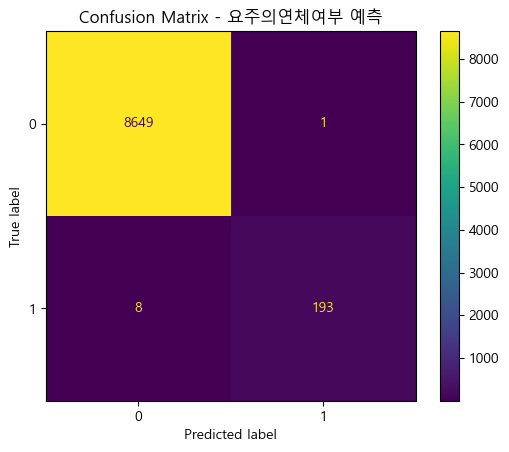

              precision    recall  f1-score   support

           0     0.9991    0.9999    0.9995      8650
           1     0.9948    0.9602    0.9772       201

    accuracy                         0.9990      8851
   macro avg     0.9970    0.9800    0.9883      8851
weighted avg     0.9990    0.9990    0.9990      8851



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target_col = '요주의연체여부'

# 2. 타겟 변수 생성
df_reduced[target_col] = (df_reduced['기업신용공여연체과목수(일보)(6개월내유지)(해제포함)'] > 0).astype(int)

# 3. X / y 분리
X = df_reduced.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target_col, '기준년월', '가명 식별자', '모형개발용Performance(향후1년내부도여부)'], errors='ignore'
)
y = df_reduced[target_col]

# 4. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. SMOTE + 클래스 불균형 반영
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 8. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

# 9. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# 10. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 요주의연체여부 예측")
plt.grid(False)
plt.show()

# 11. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

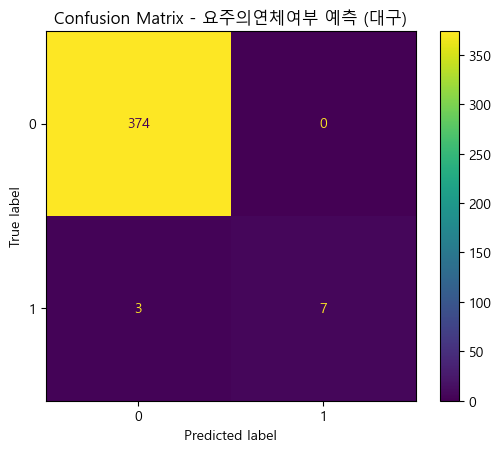

              precision    recall  f1-score   support

           0     0.9920    1.0000    0.9960       374
           1     1.0000    0.7000    0.8235        10

    accuracy                         0.9922       384
   macro avg     0.9960    0.8500    0.9098       384
weighted avg     0.9922    0.9922    0.9915       384



In [10]:
target_col = '요주의연체여부'
df_daegu = df_reduced[df_reduced['시도명'] == '대구'].copy()
df_daegu[target_col] = (df_daegu['기업신용공여연체과목수(일보)(6개월내유지)(해제포함)'] > 0).astype(int)

# 2. X / y 분리
X = df_daegu.select_dtypes(include=['int64', 'float64']).drop(
    columns=[
        target_col,
        '기준년월',
        '가명식별자',
        '모형개발용Performance(향후1년내부도여부)'
    ],
    errors='ignore'
)
y = df_daegu[target_col]

# 3. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. SMOTE 적용
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 7. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

# 8. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# 9. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 요주의연체여부 예측 (대구)")
plt.grid(False)
plt.show()

# 10. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
#기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)

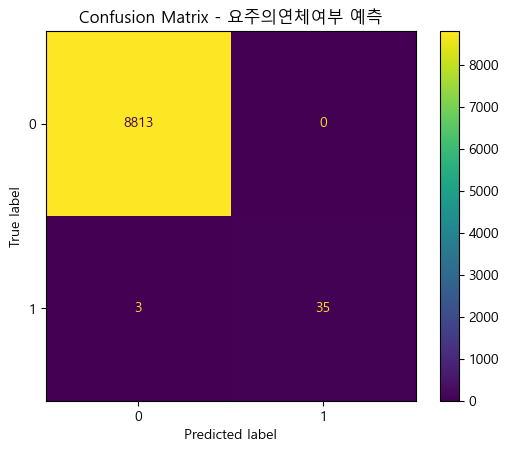

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998      8813
           1     1.0000    0.9211    0.9589        38

    accuracy                         0.9997      8851
   macro avg     0.9998    0.9605    0.9794      8851
weighted avg     0.9997    0.9997    0.9997      8851



In [24]:
target_col = '요주의연체여부'

# 2. 타겟 변수 생성
df_reduced[target_col] = (df_reduced['기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)'] > 0).astype(int)

# 3. X / y 분리
X = df_reduced.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target_col, '기준년월', '가명 식별자', '모형개발용Performance(향후1년내부도여부)'], errors='ignore'
)
y = df_reduced[target_col]

# 4. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. SMOTE + 클래스 불균형 반영
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 8. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

# 9. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# 10. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 요주의연체여부 예측")
plt.grid(False)
plt.show()

# 11. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

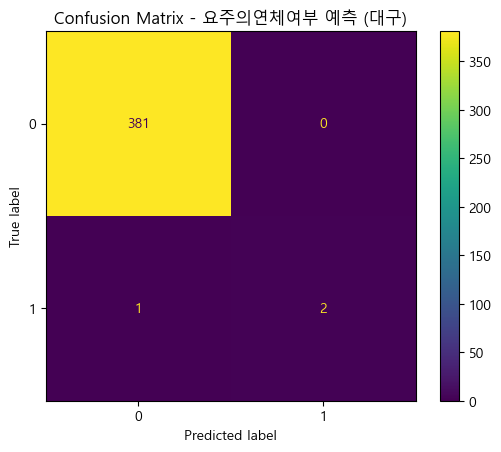

              precision    recall  f1-score   support

           0     0.9974    1.0000    0.9987       381
           1     1.0000    0.6667    0.8000         3

    accuracy                         0.9974       384
   macro avg     0.9987    0.8333    0.8993       384
weighted avg     0.9974    0.9974    0.9971       384



In [25]:
target_col = '요주의연체여부'
df_daegu = df_reduced[df_reduced['시도명'] == '대구'].copy()
df_daegu[target_col] = (df_daegu['기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)'] > 0).astype(int)

# 2. X / y 분리
X = df_daegu.select_dtypes(include=['int64', 'float64']).drop(
    columns=[
        target_col,
        '기준년월',
        '가명식별자',
        '모형개발용Performance(향후1년내부도여부)'
    ],
    errors='ignore'
)
y = df_daegu[target_col]

# 3. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. SMOTE 적용
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 7. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

# 8. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# 9. Confusion Matrix 시각화
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 요주의연체여부 예측 (대구)")
plt.grid(False)
plt.show()

# 10. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
#기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함)

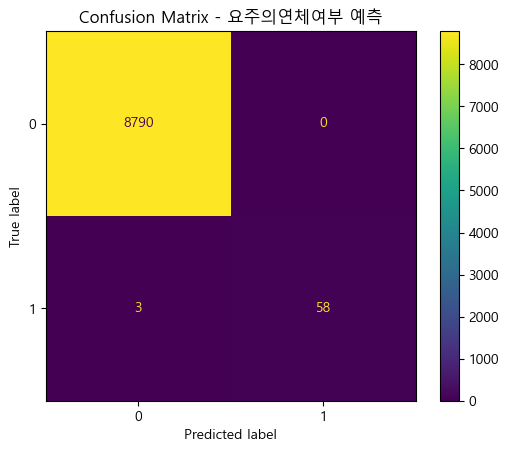

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998      8790
           1     1.0000    0.9508    0.9748        61

    accuracy                         0.9997      8851
   macro avg     0.9998    0.9754    0.9873      8851
weighted avg     0.9997    0.9997    0.9997      8851



In [33]:
target_col = '요주의연체여부'

# 2. 타겟 변수 생성
df_reduced[target_col] = (df_reduced['기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함)'] > 0).astype(int)

# 3. X / y 분리
X = df_reduced.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target_col, '기준년월', '가명 식별자', '모형개발용Performance(향후1년내부도여부)'], errors='ignore'
)
y = df_reduced[target_col]

# 4. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. SMOTE + 클래스 불균형 반영
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 8. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

#  9. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# 10. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 요주의연체여부 예측")
plt.grid(False)
plt.show()

# 11. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

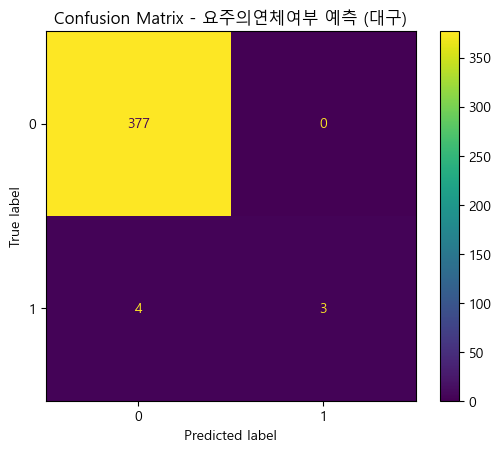

              precision    recall  f1-score   support

           0     0.9895    1.0000    0.9947       377
           1     1.0000    0.4286    0.6000         7

    accuracy                         0.9896       384
   macro avg     0.9948    0.7143    0.7974       384
weighted avg     0.9897    0.9896    0.9875       384



In [34]:
target_col = '요주의연체여부'
df_daegu = df_reduced[df_reduced['시도명'] == '대구'].copy()
df_daegu[target_col] = (df_daegu['기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함)'] > 0).astype(int)

# 2. X / y 분리
X = df_daegu.select_dtypes(include=['int64', 'float64']).drop(
    columns=[
        target_col,
        '기준년월',
        '가명식별자',
        '모형개발용Performance(향후1년내부도여부)'
    ],
    errors='ignore'
)
y = df_daegu[target_col]

# 3. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. SMOTE 적용
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 7. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

# 8. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# 9. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 요주의연체여부 예측 (대구)")
plt.grid(False)
plt.show()

# 10. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

### 부도위험 파악 eda

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_20260\672114044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_company_count, x='시군구명', y='기업 수', palette='Set2')


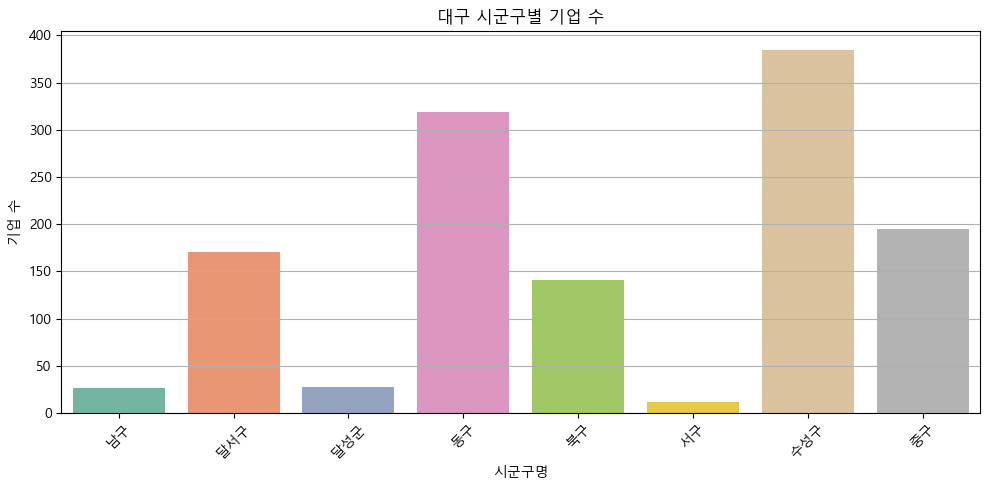

In [30]:
# 가명식별자를 기준으로 시군구별 고유 기업 수 계산
district_company_count = df_daegu.groupby('시군구명')['가명식별자'].nunique().reset_index()
district_company_count.columns = ['시군구명', '기업 수']

plt.figure(figsize=(10,5))
sns.barplot(data=district_company_count, x='시군구명', y='기업 수', palette='Set2')
plt.title('대구 시군구별 기업 수')
plt.ylabel('기업 수')
plt.xlabel('시군구명')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

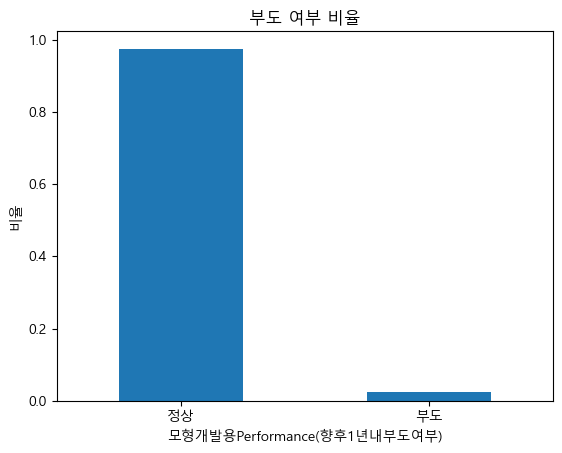

In [6]:
df_reduced['모형개발용Performance(향후1년내부도여부)'].value_counts(normalize=True).plot(kind='bar')
plt.title('부도 여부 비율')
plt.xticks([0,1], ['정상', '부도'], rotation=0)
plt.ylabel('비율')
plt.show()

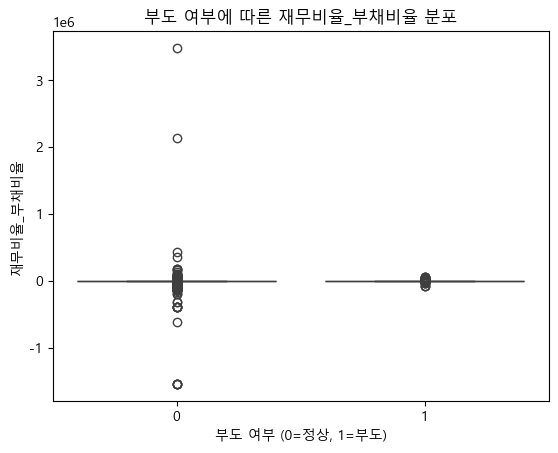

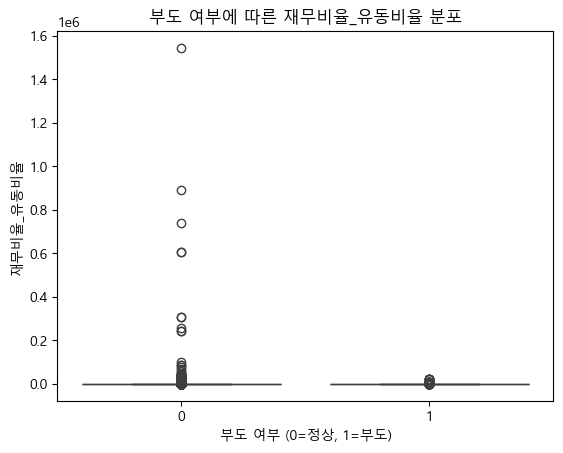

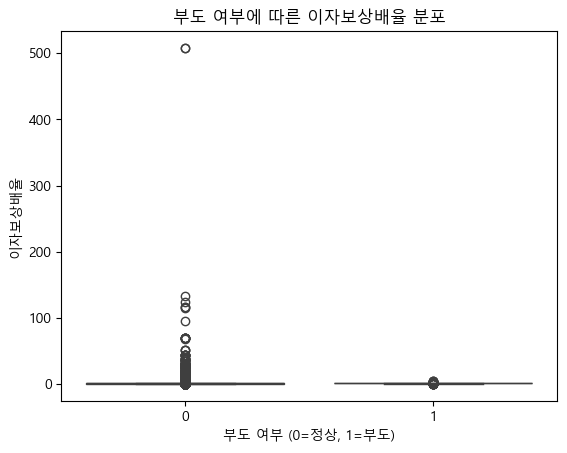

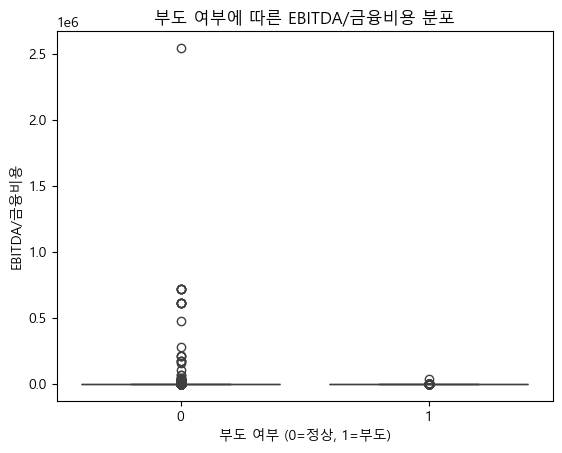

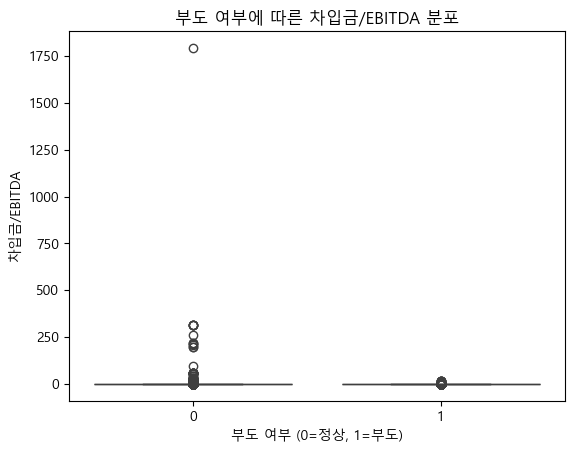

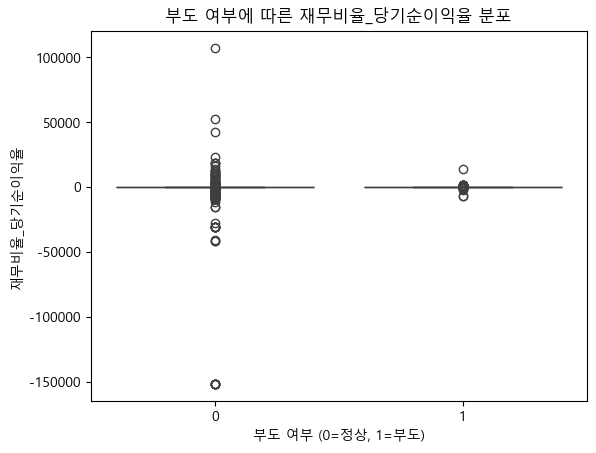

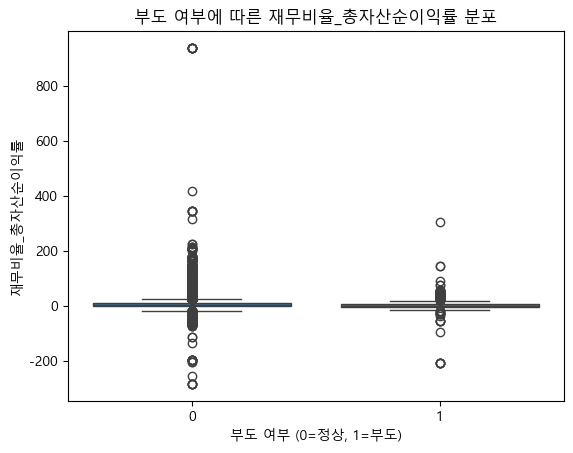

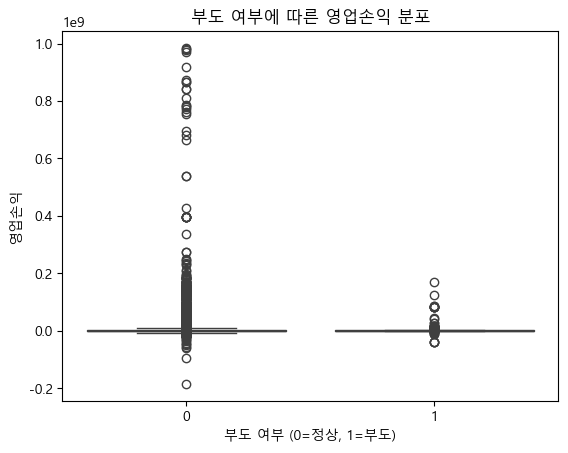

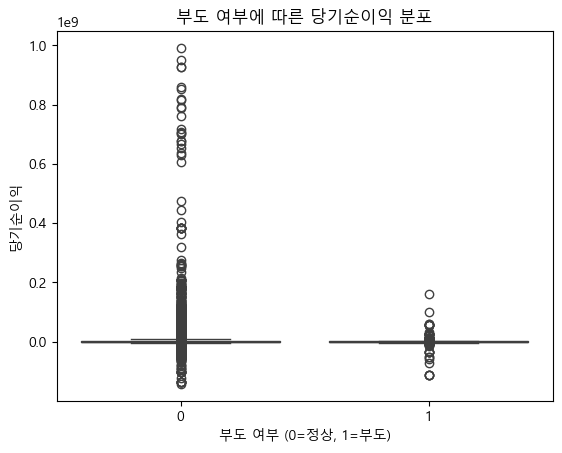

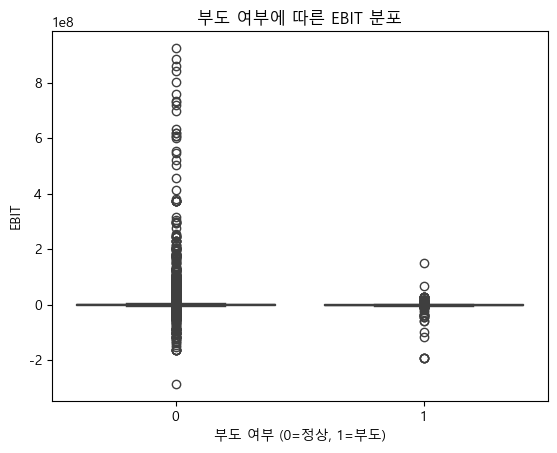

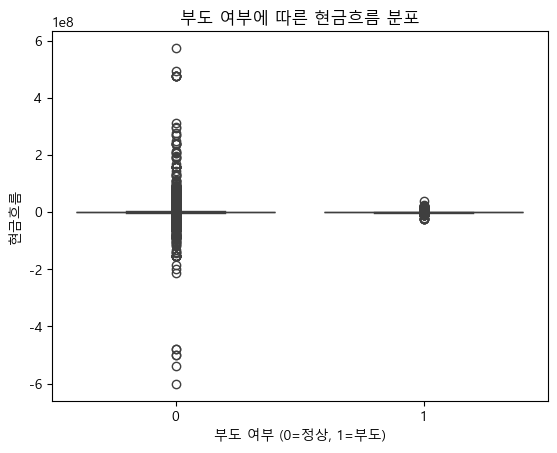

In [7]:
key_cols = [
    '재무비율_부채비율', '재무비율_유동비율', '이자보상배율', 'EBITDA/금융비용', '차입금/EBITDA',
    '재무비율_당기순이익율', '재무비율_총자산순이익률', '영업손익', '당기순이익', 'EBIT', '현금흐름'
]

for col in key_cols:
    sns.boxplot(x='모형개발용Performance(향후1년내부도여부)', y=col, data=df_reduced)
    plt.title(f'부도 여부에 따른 {col} 분포')
    plt.xlabel('부도 여부 (0=정상, 1=부도)')
    plt.show()

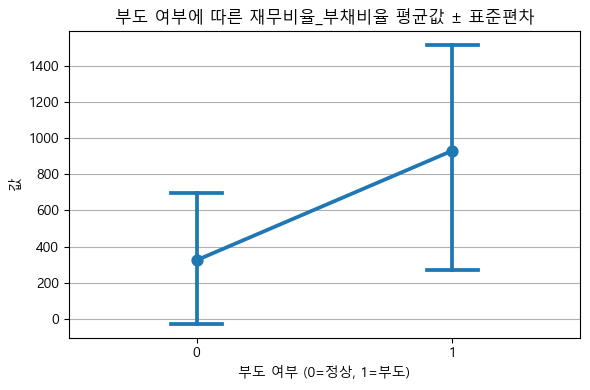

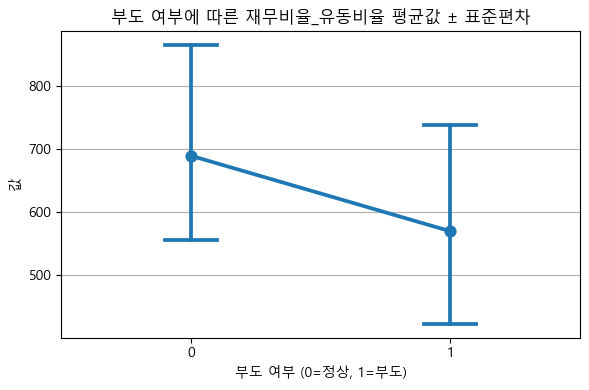

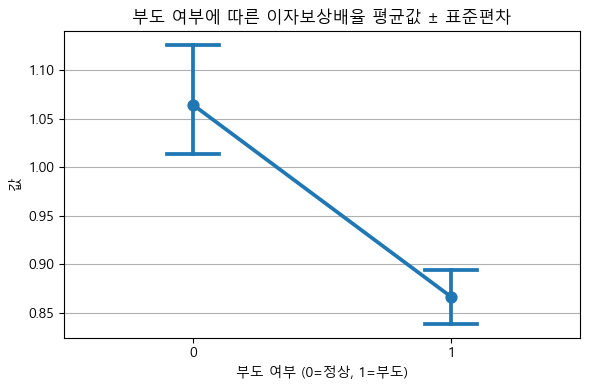

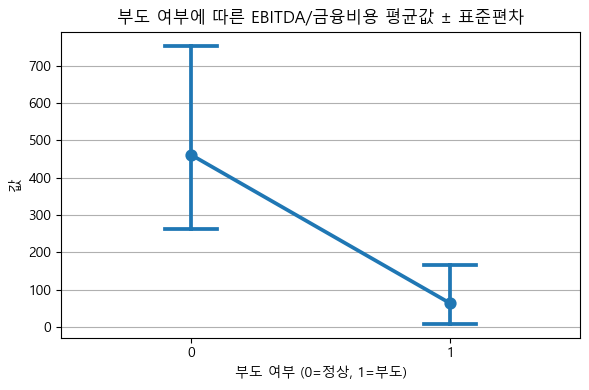

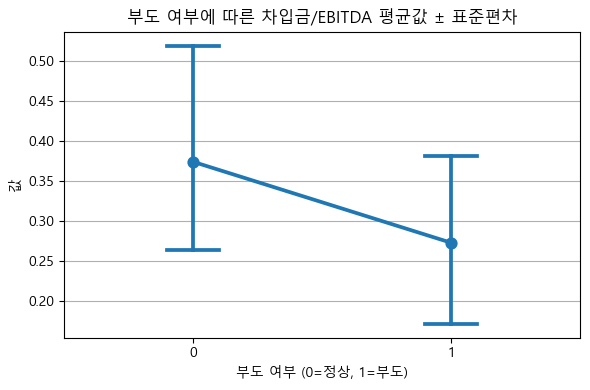

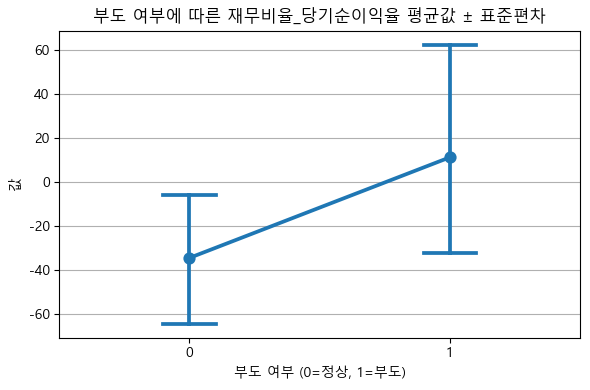

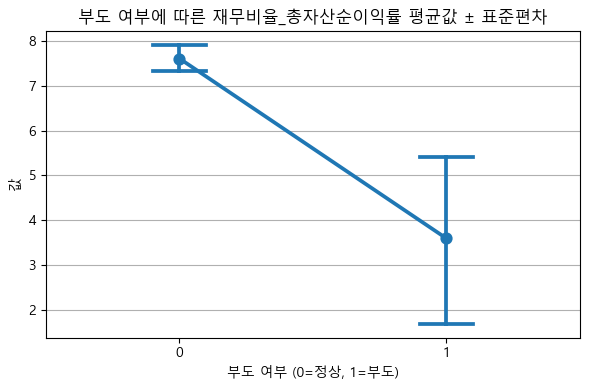

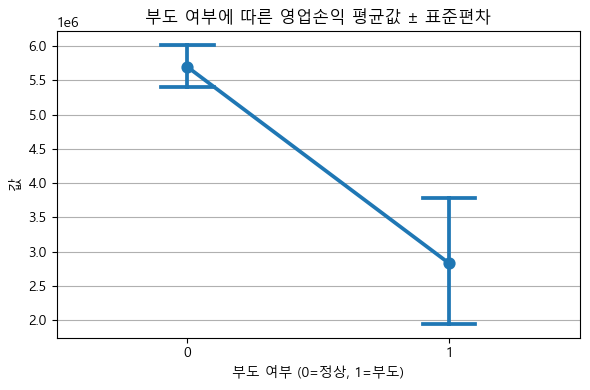

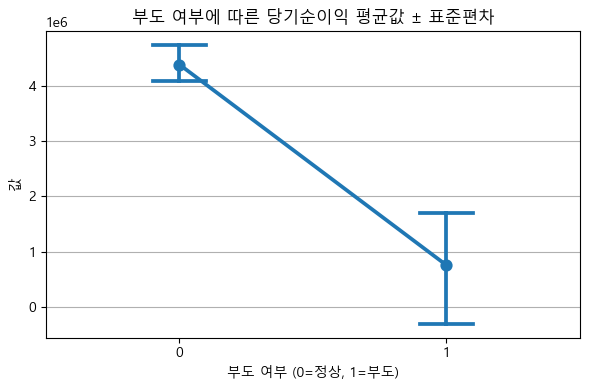

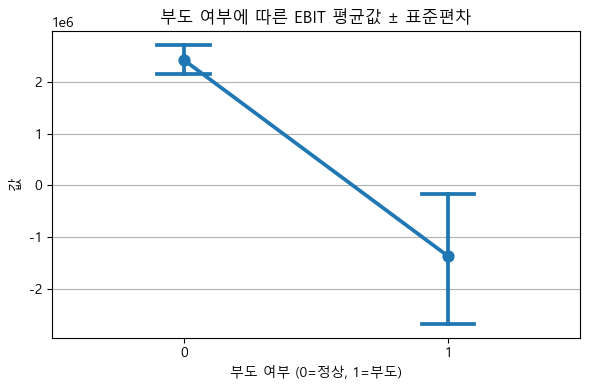

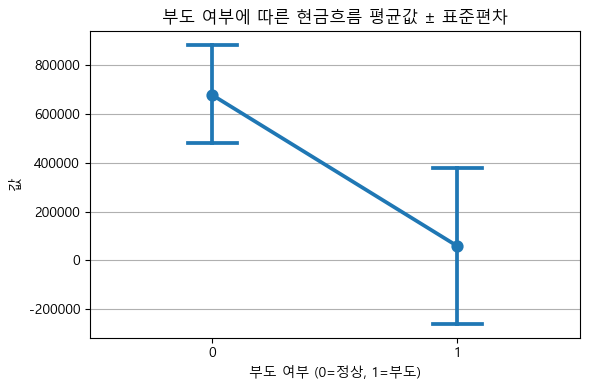

In [10]:
for col in key_cols:
    plt.figure(figsize=(6,4))
    sns.pointplot(x='모형개발용Performance(향후1년내부도여부)', y=col, data=df_reduced, capsize=0.2)
    plt.title(f'부도 여부에 따른 {col} 평균값 ± 표준편차')
    plt.xlabel('부도 여부 (0=정상, 1=부도)')
    plt.ylabel('값')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

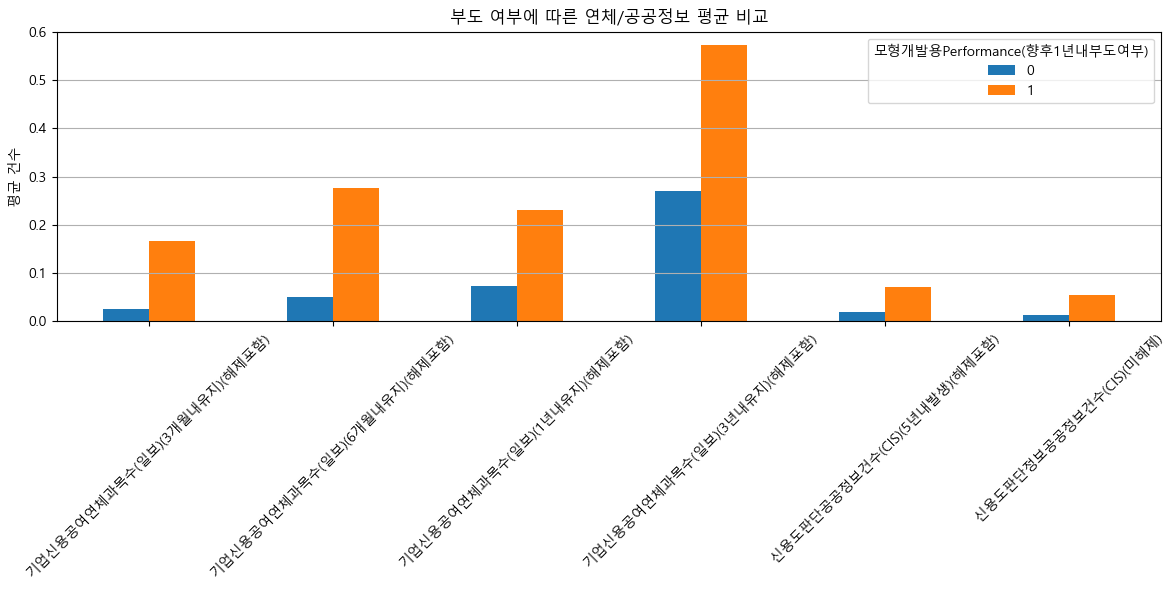

In [8]:
delay_cols = [
    '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(6개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(1년내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3년내유지)(해제포함)',
    '신용도판단공공정보건수(CIS)(5년내발생)(해제포함)',
    '신용도판단정보공공정보건수(CIS)(미해제)'
]

df_reduced.groupby('모형개발용Performance(향후1년내부도여부)')[delay_cols].mean().T.plot(kind='bar', figsize=(12,6))
plt.title('부도 여부에 따른 연체/공공정보 평균 비교')
plt.ylabel('평균 건수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
region_df = df_reduced.groupby(['시도명', '시군구명'])['모형개발용Performance(향후1년내부도여부)'].agg(['count', 'sum'])
region_df['부도율'] = region_df['sum'] / region_df['count']
region_df = region_df.sort_values('부도율', ascending=False)
region_df[['부도율']].head(10)  # 부도율 높은 상위 10개 지역 출력

,,부도율
시도명,시군구명,
충남,서산시,1
전남,담양군,0
대구,달성군,0
충남,예산군,0
전남,광양시,0
부산,사상구,0
경기,평택시,0
인천,중구,0
전남,나주시,0


In [16]:
region_df = df_reduced.groupby(['시도명', '시군구명'])['모형개발용Performance(향후1년내부도여부)'].agg(['count', 'sum'])
region_df['부도율'] = region_df['sum'] / region_df['count']
region_df['부도율'] = region_df['부도율'].round(2)  # 소수점 2자리까지 반올림
region_df = region_df.sort_values('부도율', ascending=False)
pd.options.display.float_format = '{:.2f}'.format
region_df[['부도율']].head(10) # 부도율 높은 상위 10개 지역

,,부도율
시도명,시군구명,
충남,서산시,1.00
전남,담양군,0.50
대구,달성군,0.29
충남,예산군,0.25
전남,광양시,0.20
부산,사상구,0.17
인천,중구,0.13
경기,평택시,0.13
전남,나주시,0.11


In [31]:
# 1. 대구 필터링
df_daegu = df_reduced[df_reduced['시도명'] == '대구'].copy()
# 2. 시군구별 부도율 계산
region_df = df_daegu.groupby('시군구명')['모형개발용Performance(향후1년내부도여부)'].agg(['count', 'sum'])
region_df['부도율'] = (region_df['sum'] / region_df['count']).round(2)

# 3. 정렬하여 출력
region_df = region_df.sort_values('부도율', ascending=False)
pd.options.display.float_format = '{:.2f}'.format

# 4. 결과 출력
region_df[['부도율']].head(10)  # 대구 시군구 중 부도율 상위 10

,부도율
시군구명,
달성군,0.29
남구,0.04
중구,0.04
수성구,0.02
달서구,0.01
동구,0.00
북구,0.00
서구,0.00


In [19]:
# 1. 대구 필터링
df_daegu = df_reduced[df_reduced['시도명'] == '대구'].copy()

# 2. 주요 변수 리스트
summary_cols = [
    '재무비율_부채비율', '재무비율_유동비율', '이자보상배율', 'EBITDA/금융비용', '차입금/EBITDA',
    '재무비율_총자산순이익률', '재무비율_당기순이익율', 'EBIT', '현금흐름', '영업손익', '당기순이익',
    '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)',
    '신용도판단공공정보건수(CIS)(5년내발생)(해제포함)',
    '신용도판단정보공공정보건수(CIS)(미해제)',
    '신용도판단정보공공정보최근해제일자로부터경과일수(CIS)(해제,삭제)',
    '모형개발용Performance(향후1년내부도여부)'  # 부도 여부
]

# 3. 시군구별 평균 집계
daegu_summary = df_daegu.groupby('시군구명')[summary_cols].mean().round(2)

# 4. 부도율 계산
daegu_summary['부도율'] = df_daegu.groupby('시군구명')['모형개발용Performance(향후1년내부도여부)'].mean().round(2)

# 5. 부도율 기준 정렬
daegu_summary = daegu_summary.sort_values('부도율', ascending=False)
daegu_summary

,재무비율_부채비율,재무비율_유동비율,이자보상배율,EBITDA/금융비용,차입금/EBITDA,재무비율_총자산순이익률,재무비율_당기순이익율,EBIT,현금흐름,영업손익,당기순이익,기업신용공여연체과목수(일보)(3개월내유지)(해제포함),신용도판단공공정보건수(CIS)(5년내발생)(해제포함),신용도판단정보공공정보건수(CIS)(미해제),"신용도판단정보공공정보최근해제일자로부터경과일수(CIS)(해제,삭제)",모형개발용Performance(향후1년내부도여부),부도율
시군구명,,,,,,,,,,,,,,,,,
달성군,-1024.43,286.42,0.83,5.53,0.15,8.46,95.37,-1226225.64,-2621844.71,1641583.00,2437217.75,0.00,0.04,0.11,928571446.00,0.29,0.29
남구,765.48,198.08,0.85,3.55,0.01,2.46,-18.30,-297941.27,281374.19,467370.38,178309.46,0.00,0.00,0.00,961538517.50,0.04,0.04
중구,-639.05,449.11,1.19,16.34,0.02,10.09,22.31,4283012.11,4143088.10,9443449.78,7073505.73,0.22,0.05,0.07,912820581.51,0.04,0.04
수성구,53.46,283.81,1.36,12.19,0.47,7.73,-0.58,788427.68,1931770.41,3458993.92,2051554.30,0.01,0.05,0.05,914285756.99,0.02,0.02
달서구,722.80,566.64,0.75,15.38,0.21,5.43,2.34,812285.53,-1263957.31,1947802.73,2032062.40,0.01,0.05,0.04,865497130.71,0.01,0.01
동구,850.66,800.87,1.11,9.09,0.14,2.40,-20.92,-516987.49,1697655.06,4111388.65,1701976.31,0.01,0.01,0.01,971786846.36,0.00,0.00
북구,-1290.11,366.90,0.96,10.16,1.70,11.40,-15.86,-680447.02,-660671.59,2117150.73,695134.31,0.00,0.01,0.01,978723407.33,0.00,0.00
서구,2333.00,322.84,1.01,1.76,0.05,1.30,2.42,-2263961.75,-2030078.92,3154827.83,593124.75,0.00,0.00,0.00,916666796.75,0.00,0.00


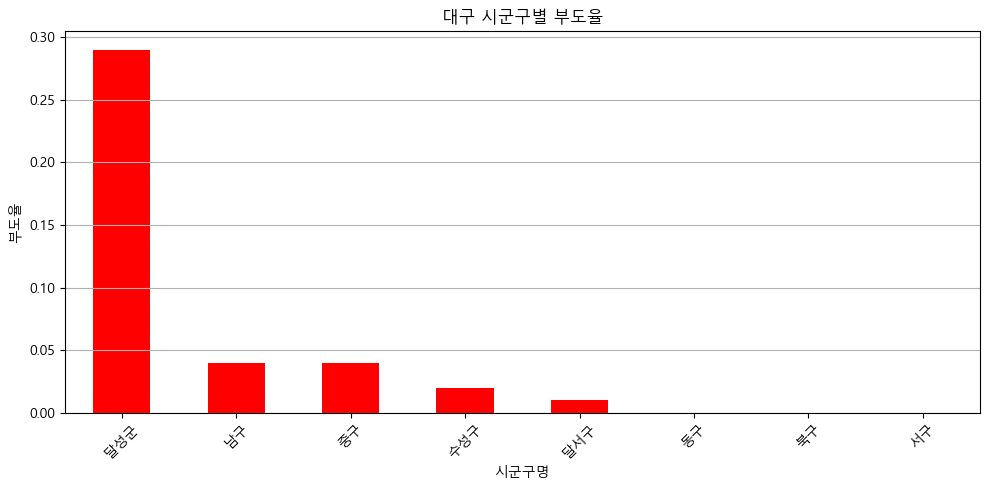

In [20]:
# 부도율 시각화
daegu_summary['부도율'].plot(kind='bar', figsize=(10,5), title='대구 시군구별 부도율', color='red')
plt.ylabel('부도율')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_20260\3219628406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eda_summary.index, y=eda_summary[target_col], palette='Reds_d')


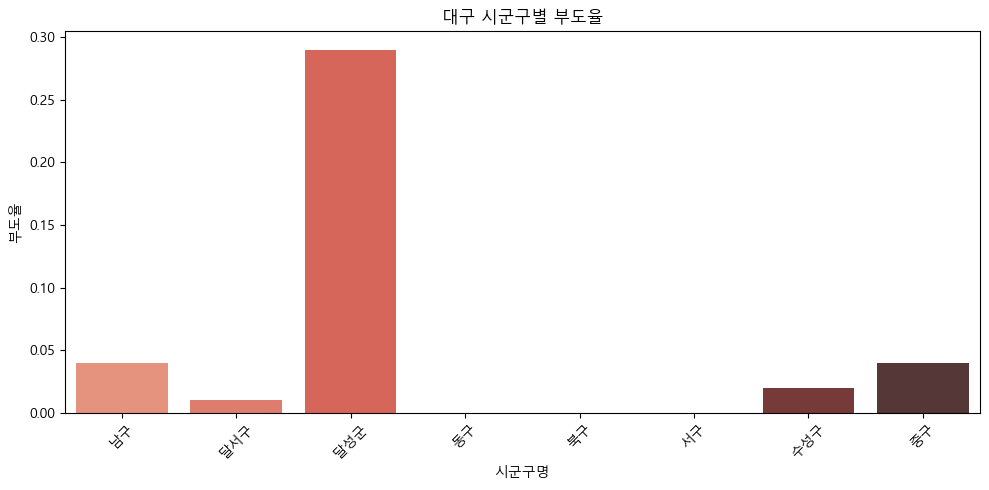

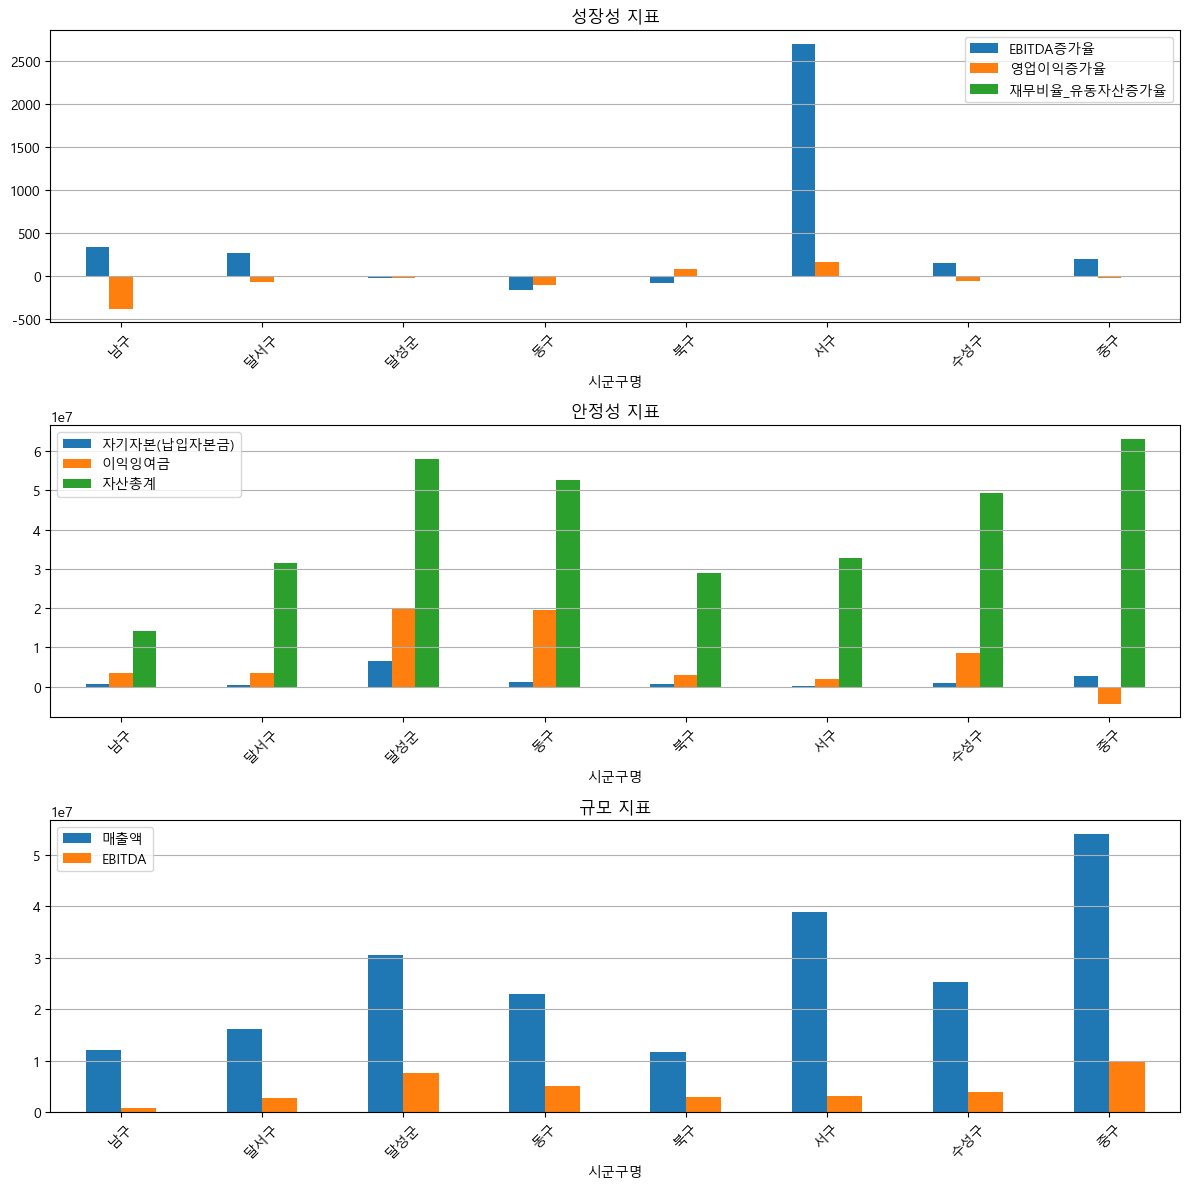

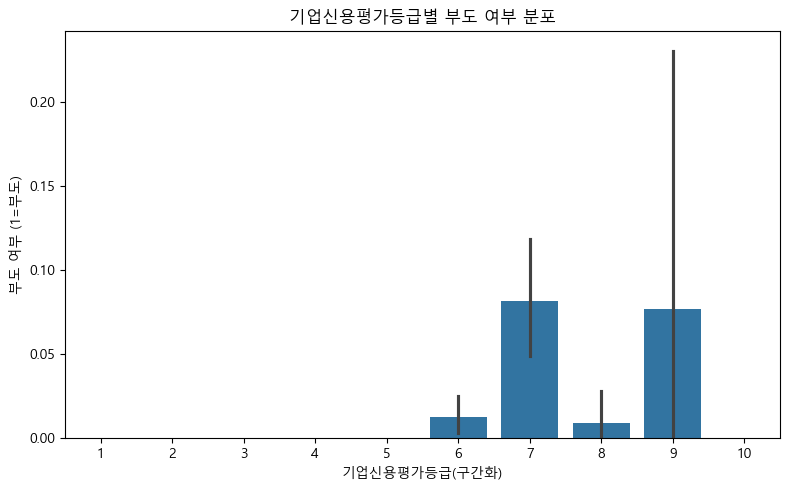

In [23]:
# 시각화용 컬럼 분류
growth_cols = ['EBITDA증가율', '영업이익증가율', '재무비율_유동자산증가율']
stability_cols = ['자기자본(납입자본금)', '이익잉여금', '자산총계']
scale_cols = ['매출액', 'EBITDA']
grade_col = '기업신용평가등급(구간화)'
target_col = '모형개발용Performance(향후1년내부도여부)'

# 필요한 컬럼만 필터링
eda_cols = growth_cols + stability_cols + scale_cols + [grade_col, target_col, '시군구명']
df_eda = df_daegu[eda_cols].copy()

# 시군구 단위 평균
eda_summary = df_eda.groupby('시군구명').mean().round(2)

# 시군구별 부도율 막대그래프
plt.figure(figsize=(10,5))
sns.barplot(x=eda_summary.index, y=eda_summary[target_col], palette='Reds_d')
plt.title('대구 시군구별 부도율')
plt.ylabel('부도율')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 성장성, 안정성, 규모 지표 묶어서 시각화 (subplot)
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
eda_summary[growth_cols].plot(kind='bar', ax=axes[0], title='성장성 지표')
eda_summary[stability_cols].plot(kind='bar', ax=axes[1], title='안정성 지표')
eda_summary[scale_cols].plot(kind='bar', ax=axes[2], title='규모 지표')
for ax in axes:
    ax.set_xticklabels(eda_summary.index, rotation=45)
    ax.grid(axis='y')
plt.tight_layout()
plt.show()

# 기업신용등급별 부도율 박스플롯
plt.figure(figsize=(8,5))
sns.barplot(x=grade_col, y=target_col, data=df_daegu)
plt.title('기업신용평가등급별 부도 여부 분포')
plt.xlabel('기업신용평가등급(구간화)')
plt.ylabel('부도 여부 (1=부도)')
plt.tight_layout()
plt.show()


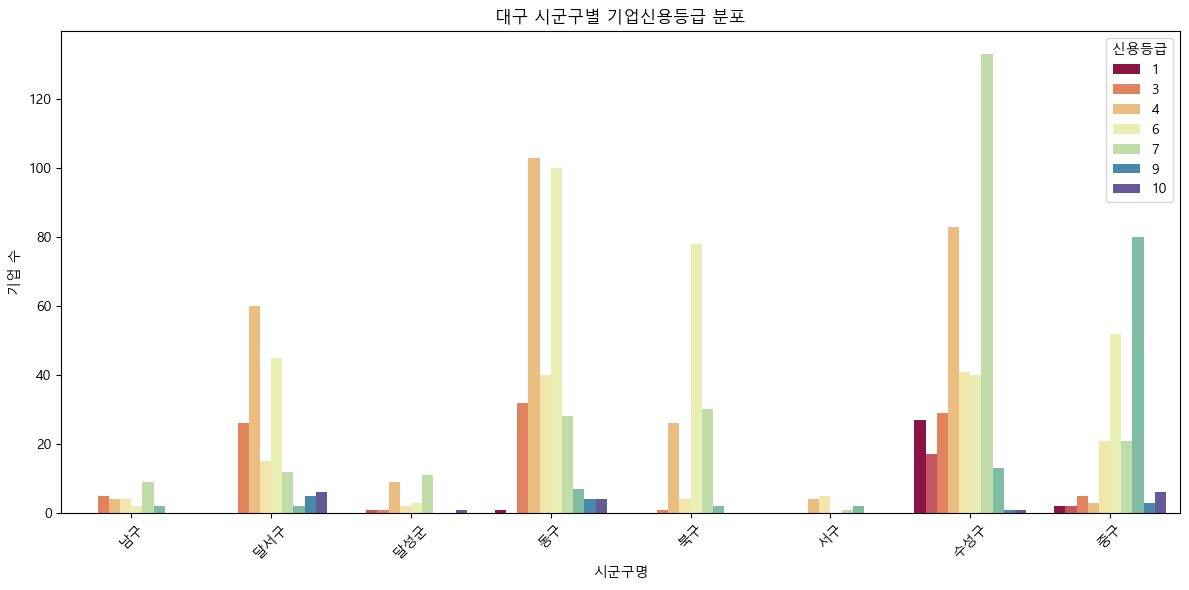

In [27]:
# 시군구별 신용등급 분포 (개수)
grade_dist = df_daegu.groupby(['시군구명', '기업신용평가등급(구간화)'])['가명식별자'].count().reset_index()
grade_dist.columns = ['시군구명', '기업신용평가등급(구간화)', '기업 수']
plt.figure(figsize=(12,6))
sns.barplot(data=grade_dist, x='시군구명', y='기업 수', hue='기업신용평가등급(구간화)', palette='Spectral')
plt.title('대구 시군구별 기업신용등급 분포')
plt.ylabel('기업 수')
plt.xlabel('시군구명')
plt.xticks(rotation=45)
plt.legend(title='신용등급')
plt.tight_layout()
plt.show()

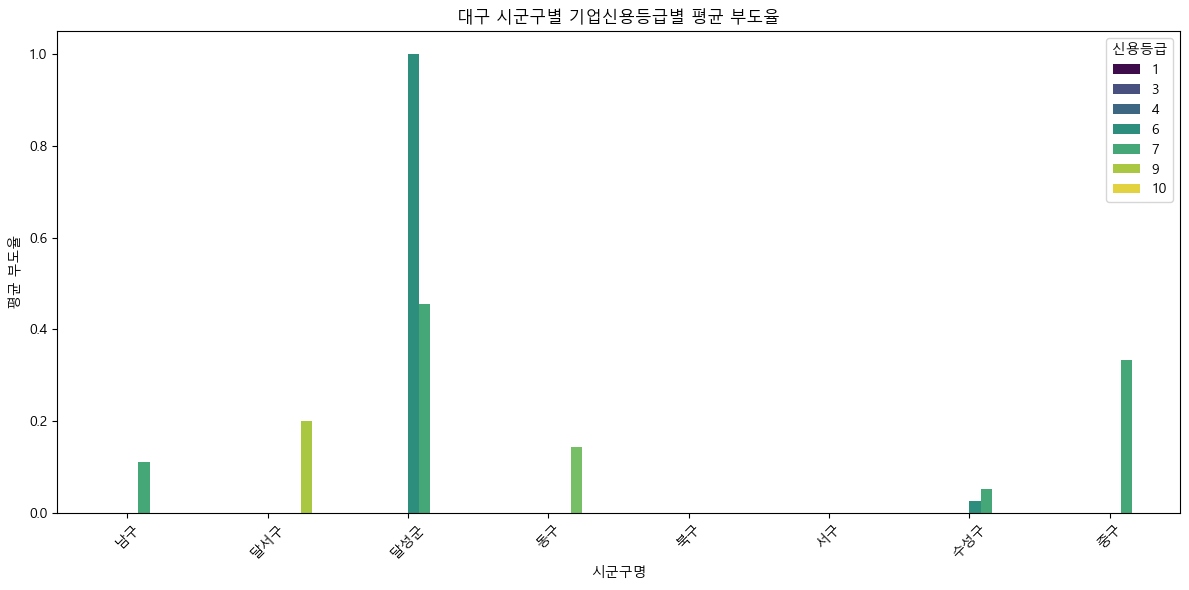

In [28]:
# 시군구 + 신용등급 기준 평균 부도율 집계
grade_by_district = df_daegu.groupby(['시군구명', '기업신용평가등급(구간화)'])['모형개발용Performance(향후1년내부도여부)'] \
                            .mean().reset_index()

grade_by_district.columns = ['시군구명', '기업신용평가등급(구간화)', '평균 부도율']
plt.figure(figsize=(12,6))
sns.barplot(data=grade_by_district, x='시군구명', y='평균 부도율', hue='기업신용평가등급(구간화)', palette='viridis')
plt.title('대구 시군구별 기업신용등급별 평균 부도율')
plt.ylabel('평균 부도율')
plt.xlabel('시군구명')
plt.xticks(rotation=45)
plt.legend(title='신용등급')
plt.tight_layout()
plt.show()

### 0711

In [25]:
num_cols = ['자산총계', '부채총계', '이익잉여금', '현금흐름', '영업손익', '당기순이익',
            'EBITDA', 'EBITDA/금융비용', '이자보상배율', '재무비율_부채비율', '재무비율_자기자본이익률(ROE)',
            '기업신용공여연체과목수(일보)(미해제)', '모형개발용Performance(향후1년내부도여부)']

df_reduced[num_cols].describe().T  # 기초 통계량

,count,mean,std,min,25%,50%,75%,max
자산총계,"29,503","65,855,176","255,237,681","17,853","13,294,362","24,189,480","50,967,332","7,948,969,847"
부채총계,"29,503","46,393,764","131,227,904","3,596","9,199,520","18,196,376","38,409,826","4,998,841,964"
이익잉여금,"29,503","12,020,367","106,887,412","-986,920,403","-4,720","1,809,376","9,073,257","2,931,481,889"
현금흐름,"29,503","661,814","16,546,704","-601,288,539","-557,206",0,"773,238","575,141,822"
영업손익,"29,503","5,622,090","27,067,778","-184,567,410","137,763","902,347","3,953,904","984,619,515"
당기순이익,"29,503","4,291,331","26,808,466","-142,666,495","-129,979","393,318","2,830,075","991,726,017"
EBITDA,"29,503","6,762,164","29,008,778","-24,717","368,272","1,431,725","4,959,704","1,161,445,308"
EBITDA/금융비용,"29,503",451,"20,121",-0,1,3,8,"2,545,170"
이자보상배율,"29,503",inf,NaN,0,1,1,1,inf
재무비율_부채비율,"29,503",340,"32,781","-1,539,669",73,227,676,"3,486,175"


In [28]:
print(df_reduced['모형개발용Performance(향후1년내부도여부)'].value_counts(dropna=False))

모형개발용Performance(향후1년내부도여부)
0    28753
1      750
Name: count, dtype: int64


In [29]:
print(df_reduced['모형개발용Performance(향후1년내부도여부)'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

모형개발용Performance(향후1년내부도여부)
0    97.46%
1     2.54%
Name: proportion, dtype: object


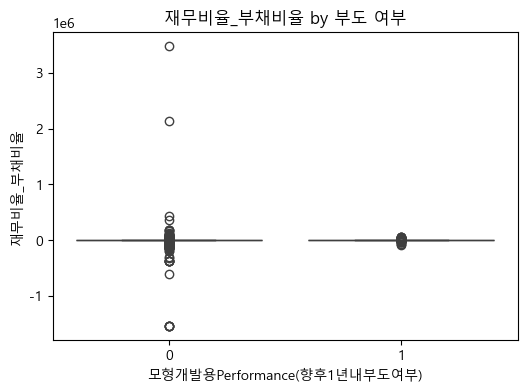

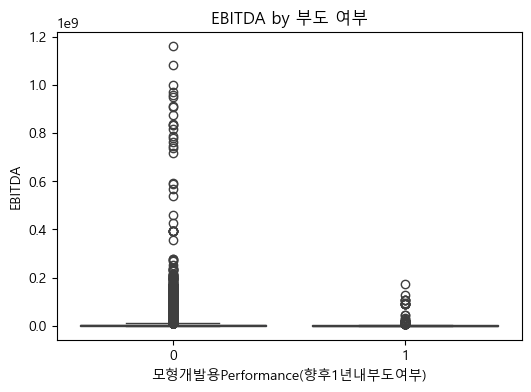

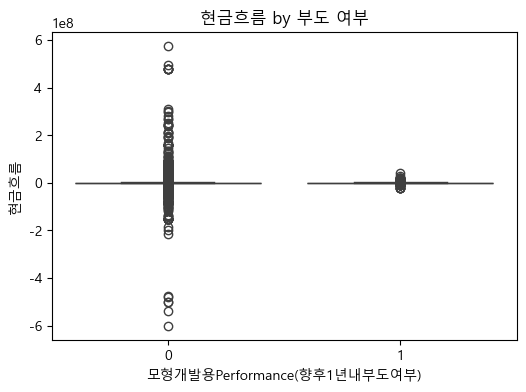

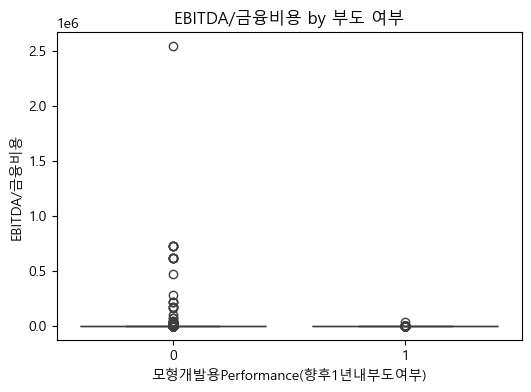

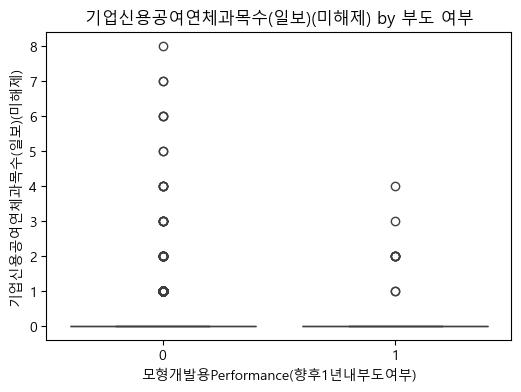

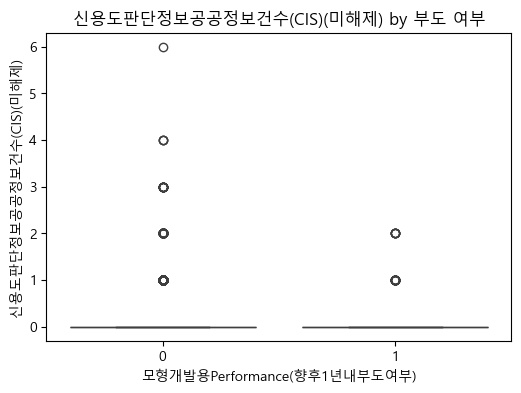

In [30]:
important_vars = ['재무비율_부채비율', 'EBITDA', '현금흐름', 'EBITDA/금융비용',
                  '기업신용공여연체과목수(일보)(미해제)', '신용도판단정보공공정보건수(CIS)(미해제)']

for col in important_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='모형개발용Performance(향후1년내부도여부)', y=col, data=df_reduced)
    plt.title(f'{col} by 부도 여부')
    plt.show()

In [31]:
# 수치형 변수 간 상관관계 (상위 몇 개만 추려도 OK)
corr = df_reduced.corr(numeric_only=True)
target_corr = corr['모형개발용Performance(향후1년내부도여부)'].sort_values(ascending=False)
print(target_corr)

모형개발용Performance(향후1년내부도여부)                 1
기업신용평가등급(구간화)                               0
재무비율_유동자산증가율                                0
기업신용공여연체과목수(일보)(3개월내유지)(해제포함)               0
기업신용공여연체과목수(일보)(6개월내유지)(해제포함)               0
신용도판단정보공공정보건수(CIS)(미해제)                     0
기업신용공여연체과목수(일보)(1년내유지)(해제포함)                0
기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)    0
기업신용공여연체과목수(일보)(3년내유지)(해제포함)                0
신용도판단공공정보건수(CIS)(5년내발생)(해제포함)               0
기업신용공여연체과목수(일보)(미해제)                        0
이자비용                                        0
재무비율_자기자본이익률(ROE)                           0
재무비율_총자산증가율                                 0
재무비율_부채비율                                   0
재무비율_당기순이익율                                 0
재무활동현금흐름                                    0
매출총이익율                                      0
EBITDA증가율                                   0
기준년월                                        0
재무비율_영업이익율                                 -0
재무비율_매출액증가율                       

<Axes: title={'center': '지역별 부도율'}, xlabel='시도명'>

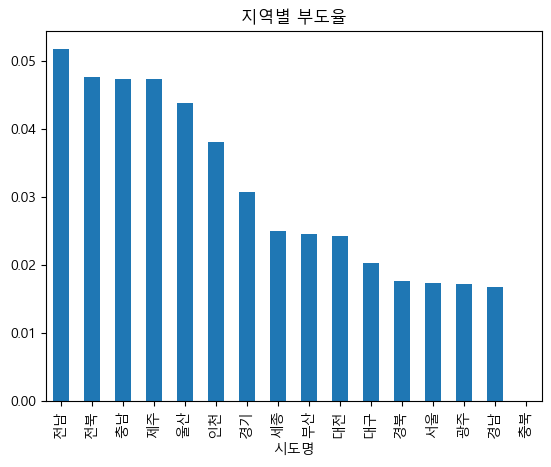

In [32]:
# 지역별
region_fail = df_reduced.groupby('시도명')['모형개발용Performance(향후1년내부도여부)'].mean().sort_values(ascending=False)
region_fail.plot(kind='bar', title='지역별 부도율')

<Axes: title={'center': '월별 부도율 추이'}, xlabel='기준년월'>

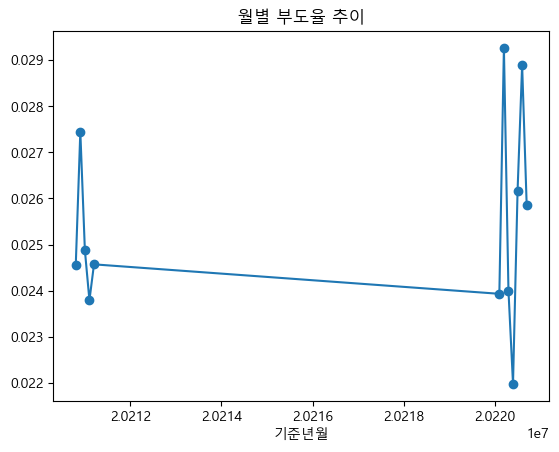

In [33]:
# 기준년월별 (트렌드 확인)
month_fail = df_reduced.groupby('기준년월')['모형개발용Performance(향후1년내부도여부)'].mean()
month_fail.plot(marker='o', title='월별 부도율 추이')

In [35]:
df_dg = df_reduced[df_reduced['시도명'] == '대구'].copy()

모형개발용Performance(향후1년내부도여부)
0    97.96%
1     2.04%
Name: proportion, dtype: object

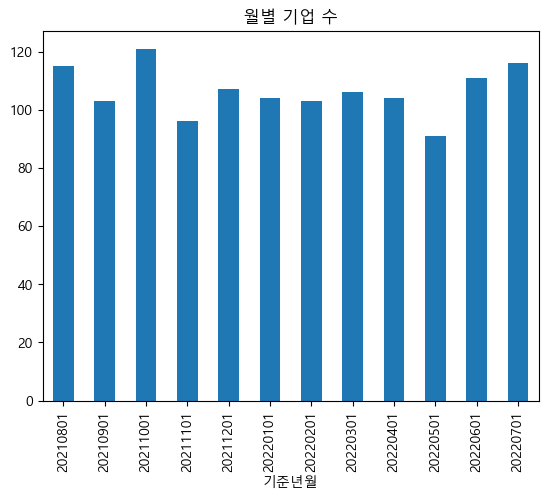

In [36]:
# 월별 기업 수
df_dg['기준년월'].value_counts().sort_index().plot(kind='bar', title='월별 기업 수')

# 업종 분포
df_dg['업종(대분류)'].value_counts()

# 부도율 분포
df_dg['모형개발용Performance(향후1년내부도여부)'].value_counts(normalize=True).map(lambda x: f"{x:.2%}")

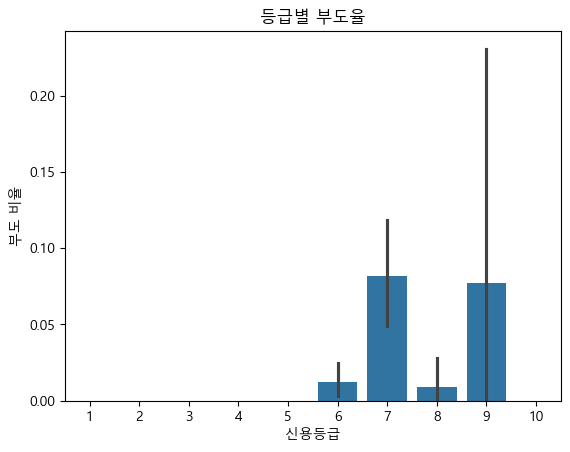

In [37]:
# 예: 기업신용평가등급별 부도율
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df_dg,
    x='기업신용평가등급(구간화)',
    y='모형개발용Performance(향후1년내부도여부)'
)
plt.title('등급별 부도율')
plt.ylabel('부도 비율')
plt.xlabel('신용등급')
plt.show()

In [38]:
cols = [
    '기업신용공여연체과목수(일보)(미해제)',
    '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)',
]

df_dg[cols].describe()

,기업신용공여연체과목수(일보)(미해제),기업신용공여연체과목수(일보)(3개월내유지)(해제포함),기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)
count,"1,277","1,277","1,277"
mean,0,0,0
std,0,1,0
min,0,0,0
25%,0,0,0
50%,0,0,0
75%,0,0,0
max,2,19,2


array([[<Axes: title={'center': '기업신용공여연체과목수(일보)(미해제)'}>,
        <Axes: title={'center': '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)'}>],
       [<Axes: title={'center': '기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)'}>,
        <Axes: >]], dtype=object)

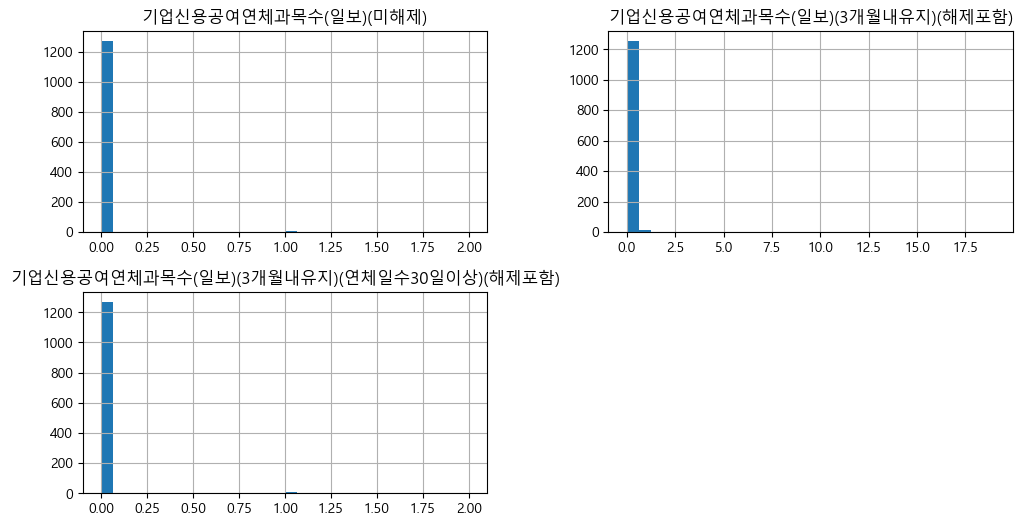

In [39]:
df_dg[cols].hist(bins=30, figsize=(12, 6))

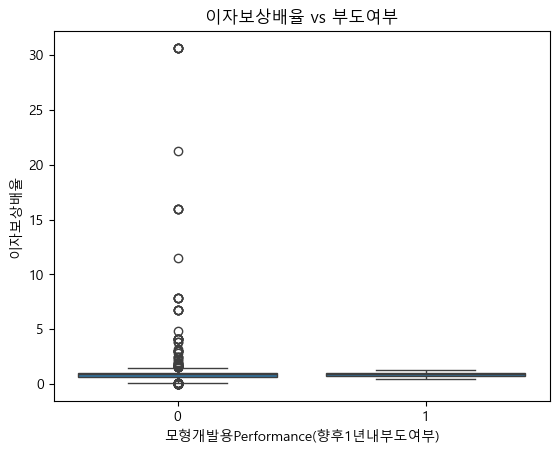

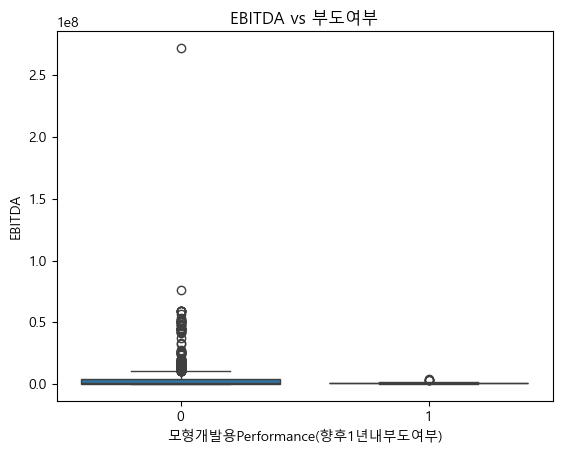

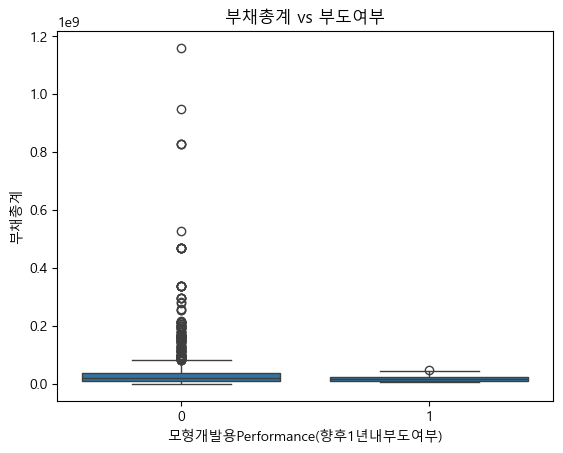

In [40]:
for col in ['이자보상배율', 'EBITDA', '부채총계']:
    sns.boxplot(data=df_dg, x='모형개발용Performance(향후1년내부도여부)', y=col)
    plt.title(f'{col} vs 부도여부')
    plt.show()

<Axes: >

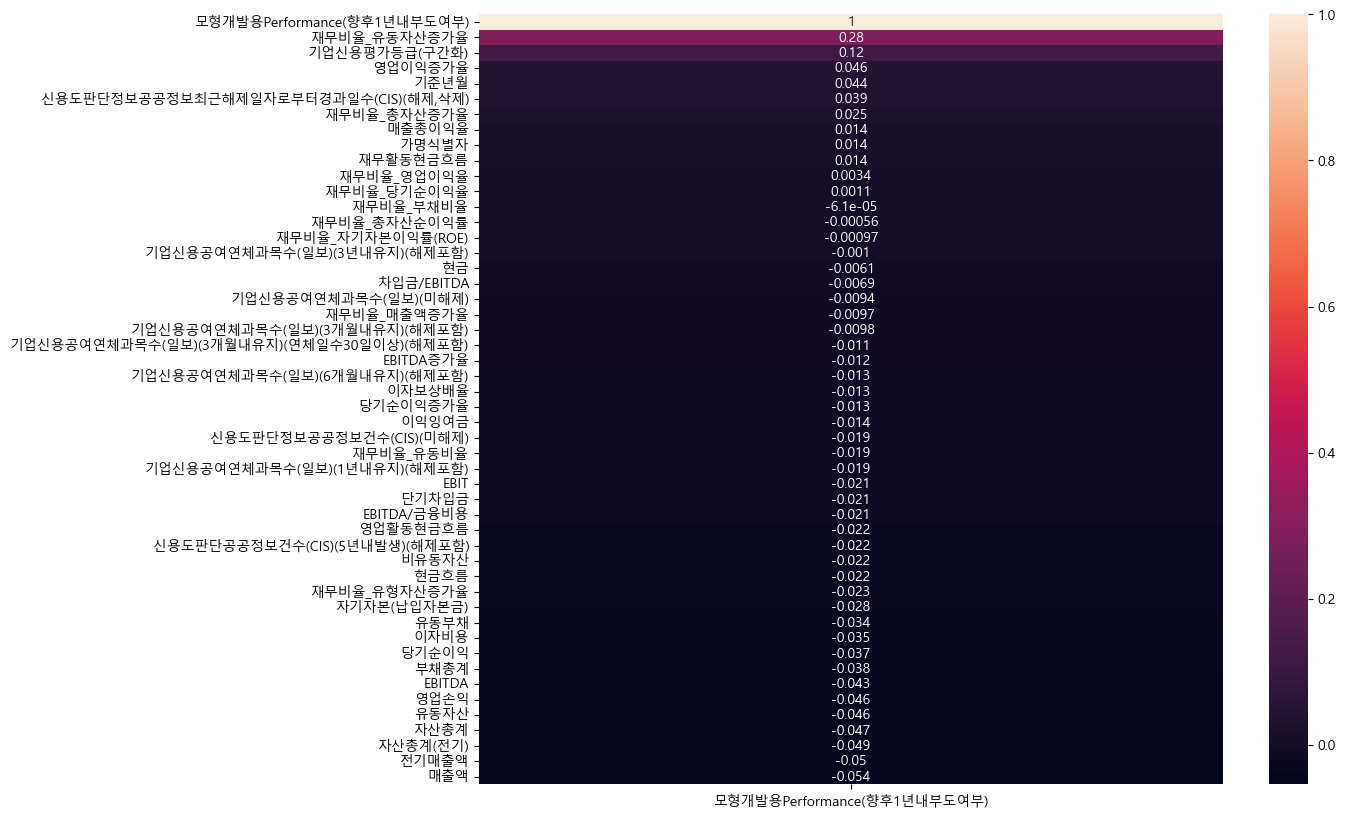

In [41]:
corr = df_dg.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[['모형개발용Performance(향후1년내부도여부)']].sort_values(by='모형개발용Performance(향후1년내부도여부)', ascending=False), annot=True)


In [44]:
cols = [
    '재무비율_부채비율', '재무비율_유동비율', '차입금/EBITDA',
    'EBITDA/금융비용', '이자보상배율'
]

df_grouped = df_reduced.groupby('모형개발용Performance(향후1년내부도여부)')[cols].mean().T
df_grouped.columns = ['정상기업', '부도기업']

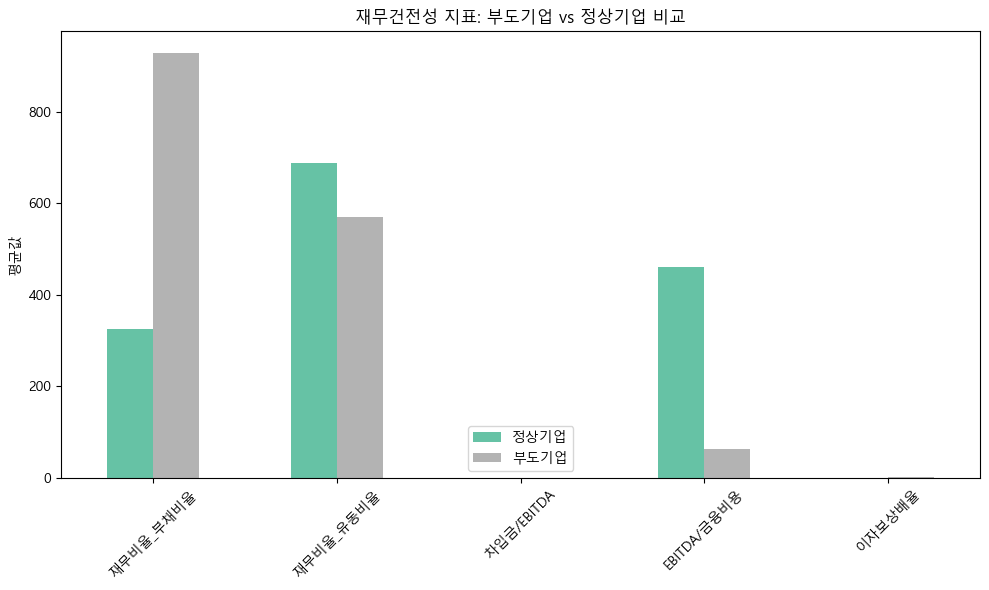

In [45]:
df_grouped.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('재무건전성 지표: 부도기업 vs 정상기업 비교')
plt.ylabel('평균값')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
df_dg = df_reduced[df_reduced['시도명'] == '대구'].copy()

# 시군구별 기업 수 및 부도율 계산
df_sgg = df_dg.groupby('시군구명').agg(
    기업수 = ('가명식별자', 'count'),
    부도기업수 = ('모형개발용Performance(향후1년내부도여부)', 'sum')
).reset_index()

df_sgg['부도율(%)'] = (df_sgg['부도기업수'] / df_sgg['기업수']) * 100

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_27336\4282056991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sgg.sort_values('부도율(%)', ascending=False),


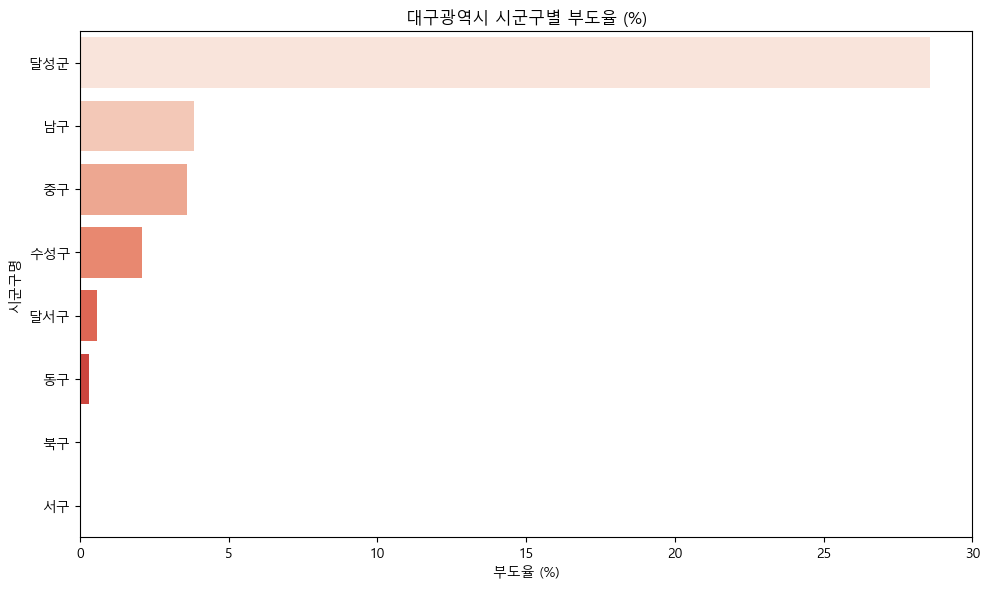

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_sgg.sort_values('부도율(%)', ascending=False), 
            x='부도율(%)', y='시군구명', palette='Reds')
plt.title('대구광역시 시군구별 부도율 (%)')
plt.xlabel('부도율 (%)')
plt.ylabel('시군구명')
plt.tight_layout()
plt.show()

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_27336\3172234519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sgg_filtered.sort_values('부도율(%)', ascending=False),


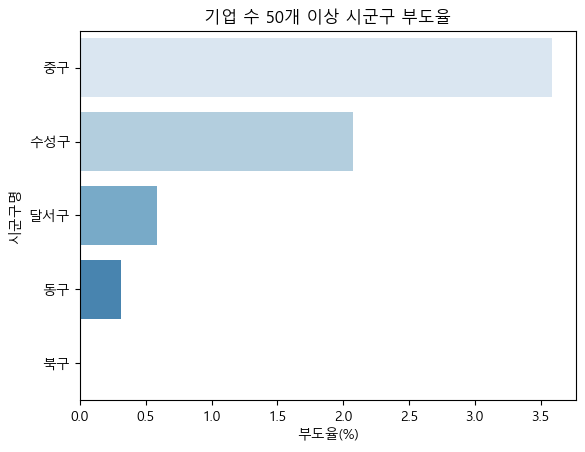

In [51]:
df_sgg_filtered = df_sgg[df_sgg['기업수'] >= 50].copy()

sns.barplot(data=df_sgg_filtered.sort_values('부도율(%)', ascending=False),
            x='부도율(%)', y='시군구명', palette='Blues')
plt.title('기업 수 50개 이상 시군구 부도율')
plt.show()

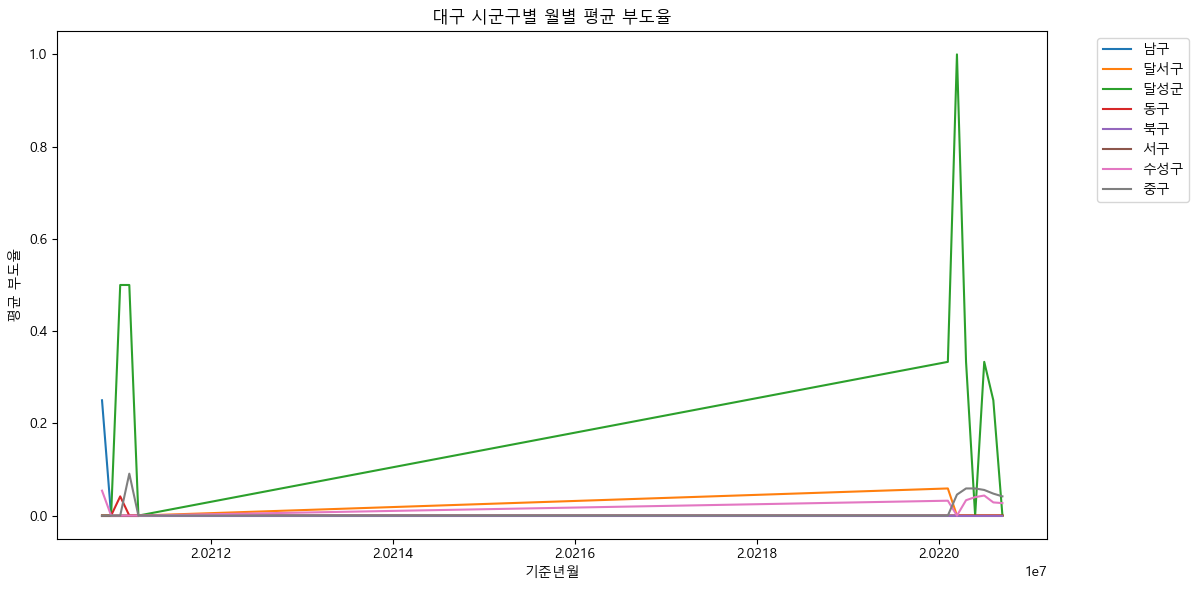

In [52]:
df_dg_month = df_dg.groupby(['기준년월', '시군구명'])['모형개발용Performance(향후1년내부도여부)'].mean().unstack()

df_dg_month.plot(figsize=(12,6))
plt.title('대구 시군구별 월별 평균 부도율')
plt.ylabel('평균 부도율')
plt.xlabel('기준년월')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()